In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Firebase ok


In [5]:
labels = []
docs = db.collection('gpt4_miniImageNet').stream()

true_labels = []
predicted_labels = []

for doc in docs:
    if doc.id == "last_index":
        continue
    doc_ref = db.collection('gpt4_miniImageNet').document(doc.id)
    doc_dict = doc.to_dict()
    true_labels.append(doc_dict['True_Label'])
    predicted_labels.append(doc_dict['Predicted_Label'])

labels = np.unique(predicted_labels)
labels

array(['African_hunting_dog', 'Arctic_fox', 'French_bulldog',
       'Gordon_setter', 'Ibizan_hound', 'Newfoundland', 'Saluki',
       'Tibetan_mastiff', 'Walker_hound', 'black-footed_ferret', 'boxer',
       'catamaran', 'cliff', 'dalmatian', 'dugong', 'golden_retriever',
       'goose', 'green_mamba', 'harvestman', 'horizontal_bar',
       'house_finch', 'jellyfish', 'king_crab', 'komondor', 'ladybug',
       'lion', 'malamute', 'meerkat', 'miniature_poodle', 'nematode',
       'rhinoceros_beetle', 'robin', 'solar_dish', 'spider_web', 'toucan',
       'triceratops', 'trifle', 'upright', 'white_wolf', 'worm_fence'],
      dtype='<U19')

In [6]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

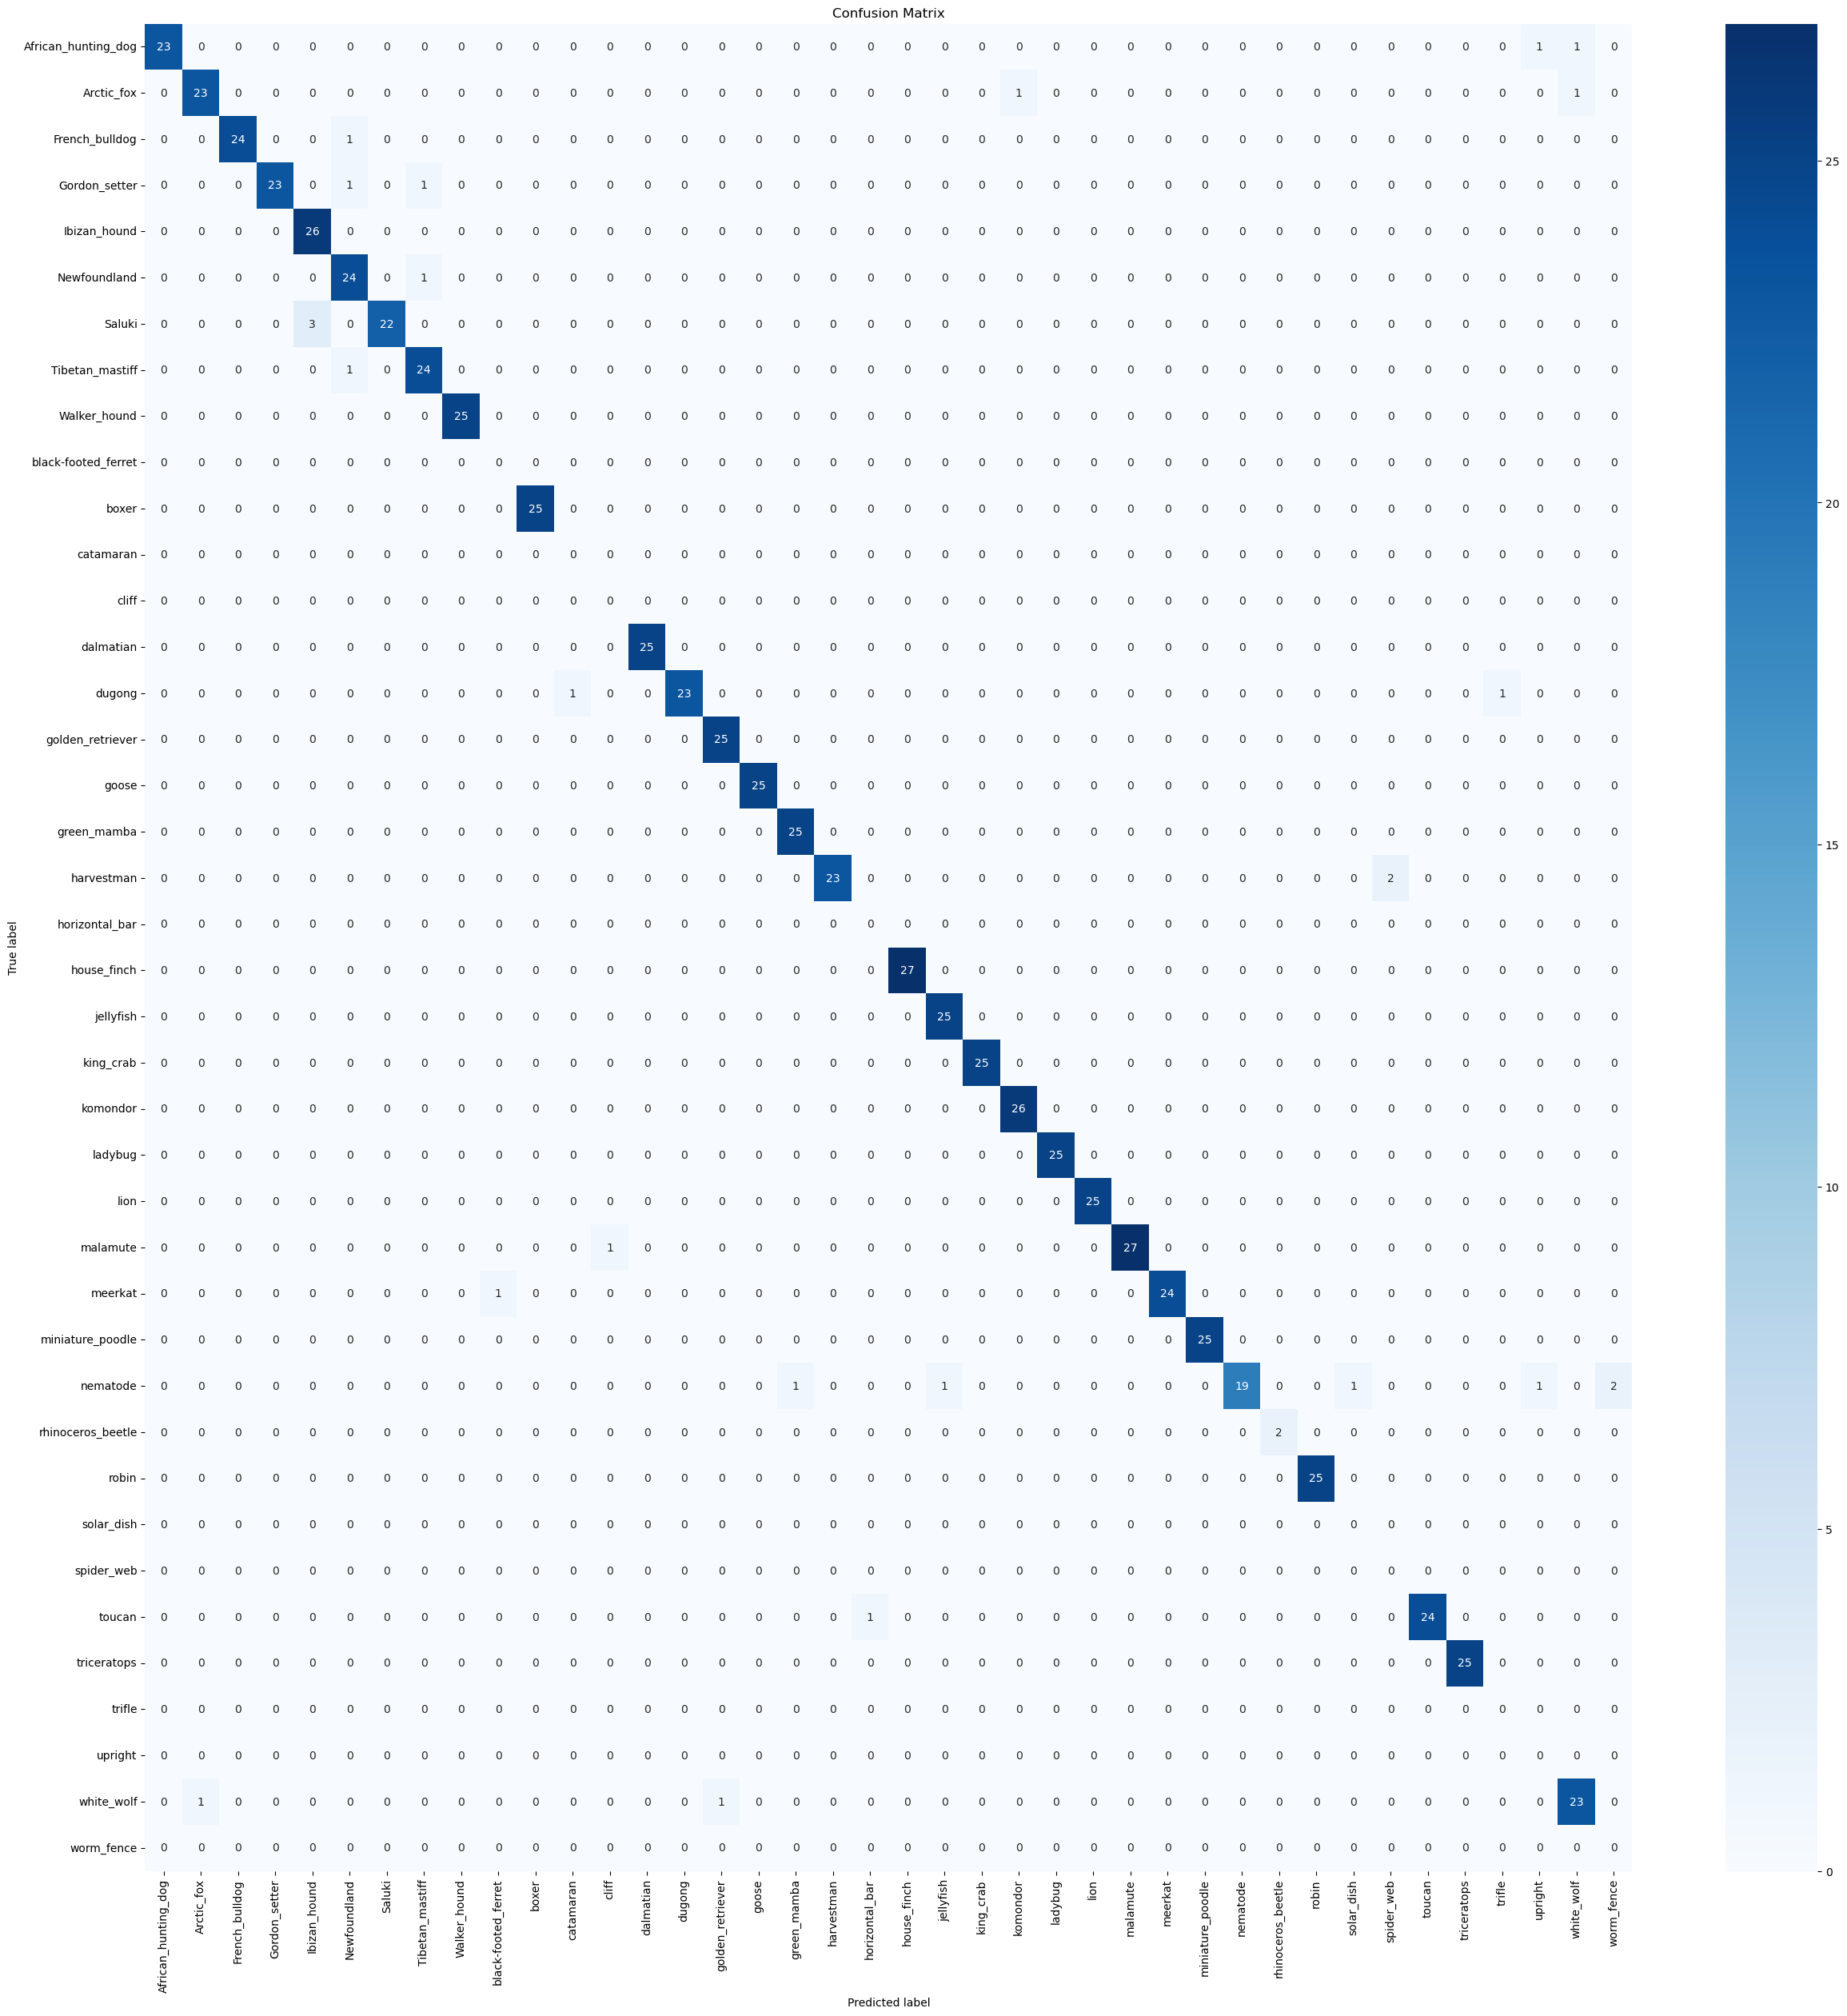

In [7]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
print(classification_report(true_labels, predicted_labels, target_names=labels))

                     precision    recall  f1-score   support

African_hunting_dog       1.00      0.92      0.96        25
         Arctic_fox       0.96      0.92      0.94        25
     French_bulldog       1.00      0.96      0.98        25
      Gordon_setter       1.00      0.92      0.96        25
       Ibizan_hound       0.90      1.00      0.95        26
       Newfoundland       0.89      0.96      0.92        25
             Saluki       1.00      0.88      0.94        25
    Tibetan_mastiff       0.92      0.96      0.94        25
       Walker_hound       1.00      1.00      1.00        25
black-footed_ferret       0.00      0.00      0.00         0
              boxer       1.00      1.00      1.00        25
          catamaran       0.00      0.00      0.00         0
              cliff       0.00      0.00      0.00         0
          dalmatian       1.00      1.00      1.00        25
             dugong       1.00      0.92      0.96        25
   golden_retriever    

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
